# Clustering

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Read data

In [63]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

#### X and y arrays

In [64]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

#### Training 

Using GridSearchCV to find the best hyperparameters

In [65]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=2023)

kmeans.fit(X)

kmeans.cluster_centers_

array([[2.37999371e+01, 1.14199760e+01, 2.03130451e+01, 3.68502100e+00,
        3.22818417e+00, 7.23668567e+00, 7.90876085e+00, 3.80816541e+01,
        7.93609992e+00, 7.77804403e+00, 1.26946665e+01, 1.78771823e+01,
        8.04249356e+01, 6.42903702e+01, 1.01847622e+03, 1.01638173e+03,
        4.94691694e+00, 4.94978397e+00, 1.50945564e+01, 1.87738821e+01,
        3.33272822e-01, 6.29458181e+00],
       [2.36066061e+01, 1.32908835e+01, 2.73789848e+01, 4.53182709e-01,
        6.56181093e+00, 1.04244403e+01, 7.44138382e+00, 4.25923089e+01,
        6.52701262e+00, 7.71634169e+00, 1.57733020e+01, 1.95711974e+01,
        5.25467004e+01, 3.33348808e+01, 1.01672206e+03, 1.01378061e+03,
        2.44948244e+00, 2.64635648e+00, 1.96154046e+01, 2.58994360e+01,
        6.73510093e-02, 6.55820351e+00]])

Get the predictions using the trained model

In [66]:
predictions = kmeans.predict(X)

In [67]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
y

0         0
1         0
2         0
3         0
4         0
         ..
140782    0
140783    0
140784    0
140785    0
140786    0
Name: RainTomorrow, Length: 140787, dtype: int64

In [69]:
predictions = np.where(predictions==1, 100, predictions)
predictions = np.where(predictions==0, 1, predictions)
predictions = np.where(predictions==100, 0, predictions)

#### Model Evaluation

Classification report

In [70]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58    109586
           1       0.08      0.15      0.11     31201

    accuracy                           0.43    140787
   macro avg       0.38      0.33      0.35    140787
weighted avg       0.55      0.43      0.48    140787



Confusion Matrix

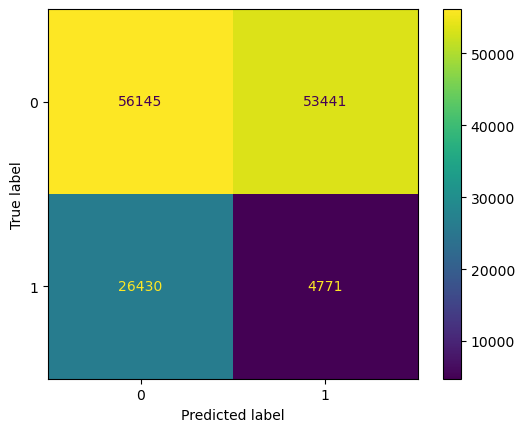

In [71]:
ConfusionMatrixDisplay.from_predictions(y, predictions)
plt.show()